In [28]:
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
import pytesseract as pyt
%matplotlib inline

In [14]:
def img_bw_data(imgpath):
    # type: (object) -> object
    img = Image.open(imgpath)
    img_bw = img.convert('L')
    pixels_array = np.where(np.asarray(img_bw) > 255/2, 0, 1)
    return pixels_array

In [39]:
imgpath = '/Users/hechengwang/Files/61da3226-1b6d-4e8d-ac6f-a2ed018669cf.png'
datapath = '/Users/hechengwang/Files/listOfFields.csv'

In [40]:
im = cv2.imread(imgpath)
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [46]:
?cv2.threshold

In [41]:
contours

[array([[[   2,    1]],
 
        [[   1,    2]],
 
        [[   1, 1582]],
 
        [[1222, 1582]],
 
        [[1222,    1]]], dtype=int32), array([[[ 963, 1397]],
 
        [[ 964, 1396]],
 
        [[ 965, 1396]],
 
        [[ 966, 1397]],
 
        [[ 966, 1398]],
 
        [[ 965, 1399]],
 
        [[ 964, 1399]],
 
        [[ 963, 1398]]], dtype=int32), array([[[ 963, 1390]],
 
        [[ 964, 1389]],
 
        [[ 965, 1389]],
 
        [[ 966, 1390]],
 
        [[ 966, 1391]],
 
        [[ 965, 1392]],
 
        [[ 964, 1392]],
 
        [[ 963, 1391]]], dtype=int32), array([[[ 921, 1387]],
 
        [[ 922, 1388]],
 
        [[ 922, 1390]],
 
        [[ 921, 1391]],
 
        [[ 921, 1393]],
 
        [[ 922, 1394]],
 
        [[ 922, 1395]],
 
        [[ 924, 1397]],
 
        [[ 927, 1397]],
 
        [[ 928, 1398]],
 
        [[ 927, 1399]],
 
        [[ 923, 1399]],
 
        [[ 919, 1395]],
 
        [[ 919, 1389]]], dtype=int32), array([[[ 921, 1387]],
 
        [[ 922, 

In [42]:
img = cv2.drawContours(im, contours, -1, (0,255,0), 3)

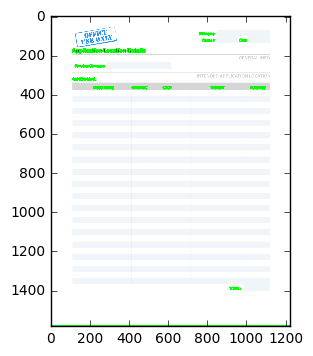

In [43]:
plt.imshow(img)

In [44]:
pyt_string = pyt.image_to_string(Image.open(imgpath), boxes=True)

OSError: [Errno 2] No such file or directory

In [22]:
data = pd.read_csv(datapath)
data['full_imgpath'] = '/Users/hechengwang/' + data['ImagePath']
img_dict = {}
imgname = 'Files/61da3226-1b6d-4e8d-ac6f-a2ed018669cf.png'

for index, row in data[data['ImagePath'] == imgname].iterrows():
    filepath = row['full_imgpath'].split('/')[-1]
    if not filepath in img_dict:
        img = img_bw_data(row['full_imgpath'])
        img_dict[filepath] = [img, np.zeros(img.shape)]
        x, y, x1, y1 = row['X'], row['Y'], row['X'] + row['W'], row['Y'] + row['H']
        img_dict[filepath][-1][y:y1, x:x1] = np.ones((y1 - y, x1 - x))
    else:
        x, y, x1, y1 = row['X'], row['Y'], row['X'] + row['W'], row['Y'] + row['H']
        img_dict[filepath][-1][y:y1, x:x1] = np.ones((y1 - y, x1 - x))